# Using Single and Double Exponential Smoothing for Estimating The Number of Injuries Traffic Accidents in Jordan (1981-2016)

#### Objective : Determination of Exponential Smoothing Constant to Minimize Root Mean Square Error and Mean Absolute Deviation and MAPE using Exponential Smoothing methods

This study specifies the best model which depends on the( MAPE, RMSE, MAD) results

In [357]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
#from sklearn.metrics import mean_absolute_percentage_error
#from sklearn.metrics import mean_absolute_deviation
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
from pandas import DataFrame
from numpy import mean , absolute


In [358]:
data=pd.read_csv("F://Python//Injuries_fatalities.csv")

In [359]:
data.head()

,year,Injuries
0,1981,8439
1,1982,8956
2,1983,8178
3,1984,8943
4,1985,9100


In [360]:
data.describe()

,year,Injuries
count,36.000000,36.000000
mean,1998.500000,14087.972222
std,10.535654,3832.466677
min,1981.000000,8178.000000
25%,1989.750000,10083.500000
50%,1998.500000,15518.500000
75%,2007.250000,17411.000000
max,2016.000000,19015.000000


In [361]:
df_Injuries=data['Injuries'].copy()

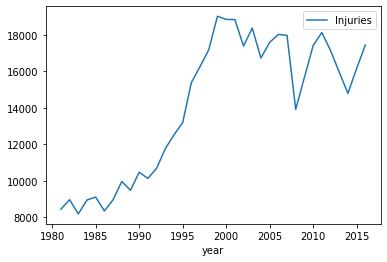

In [362]:
data.plot.line(x = 'year', 
             y = 'Injuries')
plt.show()

## Simple Exponential Smoothing

E:\Program Files (x86)\Anaconda Phyton\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


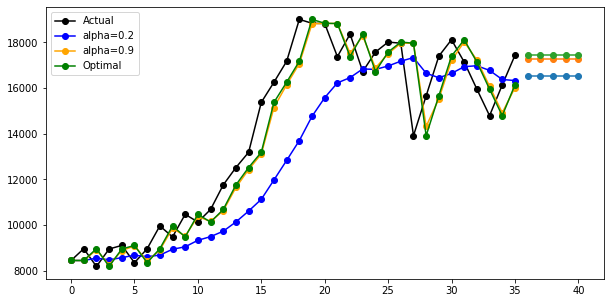

In [363]:
# Simple Exponential Smoothing
Actual = data['Injuries']
#Actual.plot(marker='o', color='black', legend=True)


fit1 = SimpleExpSmoothing(df_Injuries).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(5).rename(r'$\alpha=0.2$')

fit2 = SimpleExpSmoothing(df_Injuries).fit(smoothing_level=0.9,optimized=False)
fcast2 = fit2.forecast(5).rename(r'$\alpha=0.9$')

fit3 = SimpleExpSmoothing(df_Injuries).fit()
fcast3 = fit3.forecast(5).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

# plot

plt.figure(figsize=(10,5))
Actual.plot(marker="o", color='black',label='Actual',legend=True)
plt.plot(fcast1,marker="o")
fit1.fittedvalues.plot(marker="o", color='blue',label='alpha=0.2',legend=True)
plt.plot(fcast2,marker="o")
fit2.fittedvalues.plot(marker="o", color='orange', label='alpha=0.9',legend=True)
plt.plot(fcast3 ,marker="o")
fit3.fittedvalues.plot(marker="o", color='green',label='Optimal',legend=True)
#plt.legend(loc='best')
plt.show()





In [364]:
 # Shows the value (MAPE, RMSE) according to different values (Alpha) using the Single Exponential Smoothing for Injuries
RMSE=[]
MAPE=[]
MAD=[]

fit1 = SimpleExpSmoothing(df_Injuries).fit(smoothing_level=0.1,optimized=False)
fit2 = SimpleExpSmoothing(df_Injuries).fit(smoothing_level=0.2,optimized=False)
fit3 = SimpleExpSmoothing(df_Injuries).fit(smoothing_level=0.3,optimized=False)
fit4 = SimpleExpSmoothing(df_Injuries).fit(smoothing_level=0.4,optimized=False)
fit5 = SimpleExpSmoothing(df_Injuries).fit(smoothing_level=0.5,optimized=False)
fit6 = SimpleExpSmoothing(df_Injuries).fit(smoothing_level=0.6,optimized=False)
fit7 = SimpleExpSmoothing(df_Injuries).fit(smoothing_level=0.7,optimized=False)
fit8 = SimpleExpSmoothing(df_Injuries).fit(smoothing_level=0.8,optimized=False)
fit9 = SimpleExpSmoothing(df_Injuries).fit(smoothing_level=0.9,optimized=False)
fit10 = SimpleExpSmoothing(df_Injuries).fit(smoothing_level=1.0,optimized=False)

model_fit=[fit1,fit2,fit3,fit4,fit5,fit6,fit7,fit8,fit9,fit10]
for i in model_fit:
    mape_=round(np.mean(np.abs((df_Injuries- i.fittedvalues)/df_Injuries))*100,2)
    MAPE.append(mape_)
    
    rmse_ = round(sqrt(mean_squared_error(df_Injuries, i.fittedvalues)),2)
    RMSE.append(rmse_)

    mad_=round(mean(absolute(df_Injuries-i.fittedvalues)),2)
    MAD.append(mad_)

            
RESULT_df={'Smoothing_constant':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],'RMSE':RMSE,'MAPE':MAPE,'MAD':MAD}
ERROR_VAL=DataFrame(RESULT_df)
print(ERROR_VAL)

   Smoothing_constant     RMSE   MAPE      MAD
0                 0.1  3046.38  14.96  2312.61
1                 0.2  2133.44  10.79  1597.59
2                 0.3  1738.50   8.95  1297.71
3                 0.4  1526.09   8.09  1163.07
4                 0.5  1402.02   7.52  1076.91
5                 0.6  1326.26   7.17  1022.49
6                 0.7  1278.76   7.06  1000.33
7                 0.8  1249.04   7.01   985.77
8                 0.9  1231.93   6.98   973.97
9                 1.0  1225.50   7.02   976.00


### Choose Smoothing constant = 0.9, based on least value of RMSE,MAPE,MAD

In [371]:
#Optimal Parameter Alpha is Obtained

Optimal_SES = SimpleExpSmoothing(np.asarray(df_Injuries)).fit(optimized=True)
print('optimal alpha chosen:', Optimal_SES.model.params['smoothing_level'])

mape_opt=np.mean(np.abs((df_Injuries- Optimal_SES.fittedvalues)/df_Injuries))*100
rmse_opt = sqrt(mean_squared_error(df_Injuries, Optimal_SES.fittedvalues)) 

print("MAPE for Alpha 1.0 : ",mape_opt)
print('rmse for fitted values with alpha=0.10 :', rmse_opt)  # optimal value is much more than we predicted

E:\Program Files (x86)\Anaconda Phyton\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


optimal alpha chosen: 1.0
MAPE for Alpha 1.0 :  7.0229372852146765
rmse for fitted values with alpha=0.10 : 1225.5034793005598


MAPE for Alpha=0.9 :  6.976907591812104
rmse for fitted values with alpha=0.9 : 1231.9349066691138
MAD for fitted values with alpha=0.9 : 973.97


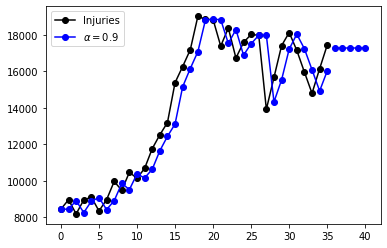

In [366]:
Actual = data['Injuries']
#Actual.plot(marker='o', color='black', legend=True)
# plot
Actual.plot(marker='o', color='black', legend=True)

fit_best = SimpleExpSmoothing(df_Injuries).fit(smoothing_level=0.9,optimized=False)
fcast_best = fit_best.forecast(5).rename(r'$\alpha=0.9$')
# plot
fcast_best.plot(marker='o', color='blue', legend=True)
fit_best.fittedvalues.plot(marker='o',  color='blue')
mape=np.mean(np.abs((df_Injuries- fit_best.fittedvalues)/df_Injuries))*100
rmse = sqrt(mean_squared_error(df_Injuries, fit_best.fittedvalues)) 
mad_=round(mean(absolute(df_Injuries-fit_best.fittedvalues)),2)

print("MAPE for Alpha=0.9 : ",mape)
print('rmse for fitted values with alpha=0.9 :', rmse)
print('MAD for fitted values with alpha=0.9 :', mad_)


In [367]:
Holt_fit = Holt(df_Injuries).fit(optimized=True)
Holt_mape_=np.mean(np.abs((df_Injuries- Holt_fit.fittedvalues)/df_Injuries))*100
Holt_rmse = sqrt(mean_squared_error(df_Injuries, fit_best.fittedvalues)) 

print('optimal smoothing level chosen:', Holt_fit.model.params['smoothing_level'])
print('optimal smoothing slope chosen:', Holt_fit.model.params['smoothing_slope'])
print("MAPE  : ",Holt_mape_)
print("RMSE : ",Holt_rmse)

optimal smoothing level chosen: 0.9678736038204095
optimal smoothing slope chosen: 0.0
MAPE  :  6.602708362849861
RMSE :  1231.9349066691138


E:\Program Files (x86)\Anaconda Phyton\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


## 2. Double Exponential Smoothing 

In [368]:
Holt_fit_1 = Holt(df_Injuries).fit(smoothing_level=0.96, smoothing_slope=0.0, optimized=False)
Holt_fit_2 = Holt(df_Injuries).fit(smoothing_level=0.96, smoothing_slope=0.1, optimized=False)
Holt_fit_3 = Holt(df_Injuries).fit(smoothing_level=0.96, smoothing_slope=0.2, optimized=False)
Holt_fit_4 = Holt(df_Injuries).fit(smoothing_level=0.96, smoothing_slope=0.3, optimized=False)
Holt_fit_5 = Holt(df_Injuries).fit(smoothing_level=0.96, smoothing_slope=0.4, optimized=False)
Holt_fit_6 = Holt(df_Injuries).fit(smoothing_level=0.96, smoothing_slope=0.5, optimized=False)
Holt_fit_7 = Holt(df_Injuries).fit(smoothing_level=0.96, smoothing_slope=0.6, optimized=False)
Holt_fit_8 = Holt(df_Injuries).fit(smoothing_level=0.96, smoothing_slope=0.7, optimized=False)
Holt_fit_9 = Holt(df_Injuries).fit(smoothing_level=0.96, smoothing_slope=0.8, optimized=False)
Holt_fit_10 = Holt(df_Injuries).fit(smoothing_level=0.96, smoothing_slope=0.9, optimized=False)

MAPE=[]
RMSE=[]
MAD=[]

model_fit=[Holt_fit_1,Holt_fit_2,Holt_fit_3,Holt_fit_4,Holt_fit_5,
           Holt_fit_6,Holt_fit_7,Holt_fit_8,Holt_fit_9,Holt_fit_10]
for i in model_fit:
    mape_=round(np.mean(np.abs((df_Injuries- i.fittedvalues)/df_Injuries))*100,2)
    MAPE.append(mape_)
    
    rmse_ = round(sqrt(mean_squared_error(df_Injuries, i.fittedvalues)),2)
    RMSE.append(rmse_)

    mad_=round(mean(absolute(df_Injuries-i.fittedvalues)),2)
    MAD.append(mad_)

            
Holt_RESULT_df={'Smoothing_slope':[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'RMSE':RMSE,'MAPE':MAPE,'MAD':MAD}
error_value_=DataFrame(Holt_RESULT_df)
print(error_value_)

   Smoothing_slope     RMSE  MAPE      MAD
0              0.0  1231.18  6.39   879.18
1              0.1  1246.68  6.87   952.35
2              0.2  1280.00  7.11   987.22
3              0.3  1316.13  7.35  1022.70
4              0.4  1356.12  7.58  1054.74
5              0.5  1398.94  7.80  1081.48
6              0.6  1443.68  8.06  1114.74
7              0.7  1490.37  8.32  1145.19
8              0.8  1539.95  8.55  1170.36
9              0.9  1594.05  8.76  1190.14


For optimal Smoothing constat 0.9, the minimum smoothing slope is 0
The smoothing parameter for the slope is estimated to be essentially zero, indicating that the trend is not changing over time. The value of  α is very close to one, showing that the level reacts strongly to each new observation.

In [369]:
# Shows the value (MAPE, RMSE) according to alpha values ( 0.9) & smoothing_slope(0 ) 
# using the Double Exponential Smoothing for Injuries

E:\Program Files (x86)\Anaconda Phyton\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


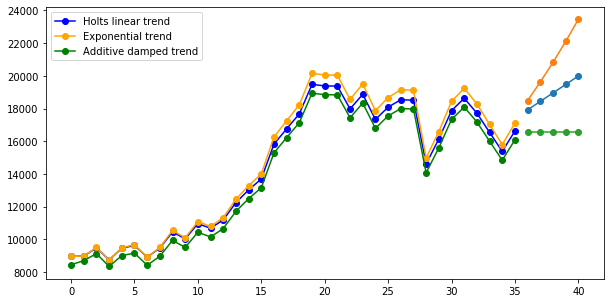

Double_exp_smoothing - MAPE for Alpha=0.9 and smoothing slope=0:  6.391101449016895
Double_exp_smoothing -rmse for fitted values with alpha=0.9 : 1231.1807253392165
Double_exp_smoothing -MAD for fitted values with Trend : 879.18

Trend - MAPE for Alpha=0.9 and smoothing slope=0:  6.836999513111863
trend -rmse for fitted values with alpha=0.9 : 1225.2307055093574
Trend -MAD for fitted values with Trend : 950.85

damped - MAPE for Alpha=0.9 and smoothing slope=0:  6.918871731594842
damped -rmse for fitted values with alpha=0.9 : 1225.2307055093574
damped -MAD for fitted values with Trend : 966.46


In [370]:
Holt_fit_best = Holt(df_Injuries).fit(smoothing_level=0.96, smoothing_slope=0.0, optimized=False)
fcast1 = Holt_fit_best.forecast(5).rename("Holt's linear trend")

Exp_trend_fit2 = Holt(df_Injuries, exponential=True).fit(smoothing_level=0.96, smoothing_slope=0, optimized=False)
fcast2 = Exp_trend_fit2.forecast(5).rename("Exponential trend")
add_damped_trend = Holt(df_Injuries, damped=True).fit(smoothing_level=0.96, smoothing_slope=0,damping_slope=0.7)
fcast3 = fit3.forecast(5).rename("Additive damped trend")
plt.figure(figsize=(10,5))
plt.plot(fcast1,marker="o")
Holt_fit_best.fittedvalues.plot(marker="o", color='blue',label='Holts linear trend',legend=True)
plt.plot(fcast2,marker="o")
Exp_trend_fit2.fittedvalues.plot(marker="o", color='orange', label='Exponential trend',legend=True)
plt.plot(fcast3 ,marker="o")
add_damped_trend.fittedvalues.plot(marker="o", color='green',label='Additive damped trend',legend=True)
#plt.legend(loc='best')
plt.show()

mape_best_Dexp=np.mean(np.abs((df_Injuries- Holt_fit_best.fittedvalues)/df_Injuries))*100
rmse_best_Dexp = sqrt(mean_squared_error(df_Injuries, Holt_fit_best.fittedvalues))
mad_Dexp=round(mean(absolute(df_Injuries-Holt_fit_best.fittedvalues)),2)

mape_best_trend=np.mean(np.abs((df_Injuries- Exp_trend_fit2.fittedvalues)/df_Injuries))*100
rmse_best_trend = sqrt(mean_squared_error(df_Injuries, Exp_trend_fit2.fittedvalues)) 
mad_trend=round(mean(absolute(df_Injuries-Exp_trend_fit2.fittedvalues)),2)

mape_best_damped=np.mean(np.abs((df_Injuries- add_damped_trend.fittedvalues)/df_Injuries))*100
rmse_best_damped = sqrt(mean_squared_error(df_Injuries, add_damped_trend.fittedvalues)) 
mad_damped=round(mean(absolute(df_Injuries-add_damped_trend.fittedvalues)),2)

print("Double_exp_smoothing - MAPE for Alpha=0.9 and smoothing slope=0: ",mape_best_Dexp)
print('Double_exp_smoothing -rmse for fitted values with alpha=0.9 :', rmse_best_Dexp)
print('Double_exp_smoothing -MAD for fitted values with Trend :', mad_Dexp)

print("\nTrend - MAPE for Alpha=0.9 and smoothing slope=0: ",mape_best_trend)
print('trend -rmse for fitted values with alpha=0.9 :', rmse_best_damped)
print('Trend -MAD for fitted values with Trend :', mad_trend)

print("\ndamped - MAPE for Alpha=0.9 and smoothing slope=0: ",mape_best_damped)
print('damped -rmse for fitted values with alpha=0.9 :', rmse_best_damped)
print('damped -MAD for fitted values with Trend :', mad_damped)


#### The forecasts generated by Holt’s linear method display a constant trend (increasing or decreasing) indefinitely into the future. Empirical evidence indicates that these methods tend to over-forecast, especially for longer forecast horizons

#### A parameter that “dampens” the trend to a flat line some time in the future

The results shown  above, based on a criterion (Least MAPE, RMSE,MAD) that the best forecast is when the value of (alpha ) is equal to (0.9) & ( smoothing slope) is equal to (0)

### Conclusion: The study proved that the use of the double exponential smoothing technique for the future forecasting of injuries resulted from traffic accidents in Jordan is better than using the Single Exponential Smoothing technique